# Generalization
:label:`sec_generalization_basics`

Consider two college students diligently
preparing for their final exam.
Commonly, this preparation will consist
of practicing and testing their abilities
by taking exams administered in previous years.
Nonetheless, doing well on past exams is no guarantee
that they will excel when it matters.
For instance, imagine a student, Extraordinary Ellie,
whose preparation consisted entirely
of memorizing the answers
to previous years' exam questions.
Even if Ellie were endowed
with an extraordinary memory,
and thus could perfectly recall the answer
to any *previously seen* question,
she might nevertheless freeze
when faced with a new (*previously unseen*) question.
By comparison, imagine another student,
Inductive Irene, with comparably poor
memorization skills,
but a knack for picking up patterns.
Note that if the exam truly consisted of
recycled questions from a previous year,
Ellie would handily outperform Irene.
Even if Irene's inferred patterns
yielded 90% accurate predictions,
they could never compete with
Ellie's 100% recall.
However, even if the exam consisted
entirely of fresh questions,
Irene might maintain her 90% average.

As machine learning scientists,
our goal is to discover *patterns*.
But how can we be sure that we have
truly discovered a *general* pattern
and not simply memorized our data?
Most of the time, our predictions are only useful
if our model discovers such a pattern.
We do not want to predict yesterday's stock prices, but tomorrow's.
We do not need to recognize
already diagnosed diseases
for previously seen patients,
but rather previously undiagnosed
ailments in previously unseen patients.
This problem---how to discover patterns that *generalize*---is
the fundamental problem of machine learning,
and arguably of all of statistics.
We might cast this problem as just one slice
of a far grander question
that engulfs all of science:
when are we ever justified
in making the leap from particular observations
to more general statements?


In real life, we must fit our models
using a finite collection of data.
The typical scales of that data
vary wildly across domains.
For many important medical problems,
we can only access a few thousand data points.
When studying rare diseases,
we might be lucky to access hundreds.
By contrast, the largest public datasets
consisting of labeled photographs,
e.g., ImageNet :cite:`Deng.Dong.Socher.ea.2009`,
contain millions of images.
And some unlabeled image collections
such as the Flickr YFC100M dataset
can be even larger, containing
over 100 million images :cite:`thomee2016yfcc100m`.
However, even at this extreme scale,
the number of available data points
remains infinitesimally small
compared to the space of all possible images
at a megapixel resolution.
Whenever we work with finite samples,
we must keep in mind the risk
that we might fit our training data,
only to discover that we failed
to discover a generalizable pattern.

The phenomenon of fitting closer to our training data
than to the underlying distribution is called *overfitting*,
and techniques for combatting overfitting
are often called *regularization* methods.
While it is no substitute for a proper introduction
to statistical learning theory (see :citet:`Vapnik98,boucheron2005theory`),
we will give you just enough intuition to get going.
We will revisit generalization in many chapters
throughout the book,
exploring both what is known about
the principles underlying generalization
in various models,
and also heuristic techniques
that have been found (empirically)
to yield improved generalization
on tasks of practical interest.



## Training Error and Generalization Error


In the standard supervised learning setting,
we assume that the training data and the test data
are drawn *independently* from *identical* distributions.
This is commonly called the *IID assumption*.
While this assumption is strong,
it is worth noting that, absent any such assumption,
we would be dead in the water.
Why should we believe that training data
sampled from distribution $P(X,Y)$
should tell us how to make predictions on
test data generated by a *different distribution* $Q(X,Y)$?
Making such leaps turns out to require
strong assumptions about how $P$ and $Q$ are related.
Later on we will discuss some assumptions
that allow for shifts in distribution
but first we need to understand the IID case,
where $P(\cdot) = Q(\cdot)$.

To begin with, we need to differentiate between
the *training error* $R_\textrm{emp}$,
which is a *statistic*
calculated on the training dataset,
and the *generalization error* $R$,
which is an *expectation* taken
with respect to the underlying distribution.
You can think of the generalization error as
what you would see  if you applied your model
to an infinite stream of additional data examples
drawn from the same underlying data distribution.
Formally the training error is expressed as a *sum* (with the same notation as :numref:`sec_linear_regression`):

$$R_\textrm{emp}[\mathbf{X}, \mathbf{y}, f] = \frac{1}{n} \sum_{i=1}^n l(\mathbf{x}^{(i)}, y^{(i)}, f(\mathbf{x}^{(i)})),$$


while the generalization error is expressed as an integral:

$$R[p, f] = E_{(\mathbf{x}, y) \sim P} [l(\mathbf{x}, y, f(\mathbf{x}))] =
\int \int l(\mathbf{x}, y, f(\mathbf{x})) p(\mathbf{x}, y) \;d\mathbf{x} dy.$$

Problematically, we can never calculate
the generalization error $R$ exactly.
Nobody ever tells us the precise form
of the density function $p(\mathbf{x}, y)$.
Moreover, we cannot sample an infinite stream of data points.
Thus, in practice, we must *estimate* the generalization error
by applying our model to an independent test set
constituted of a random selection of examples
$\mathbf{X}'$ and labels $\mathbf{y}'$
that were withheld from our training set.
This consists of applying the same formula
that was used for calculating the empirical training error
but to a test set $\mathbf{X}', \mathbf{y}'$.


Crucially, when we evaluate our classifier on the test set,
we are working with a *fixed* classifier
(it does not depend on the sample of the test set),
and thus estimating its error
is simply the problem of mean estimation.
However the same cannot be said
for the training set.
Note that the model we wind up with
depends explicitly on the selection of the training set
and thus the training error will in general
be a biased estimate of the true error
on the underlying population.
The central question of generalization
is then when should we expect our training error
to be close to the population error
(and thus the generalization error).

### Model Complexity

In classical theory, when we have
simple models and abundant data,
the training and generalization errors tend to be close.
However, when we work with
more complex models and/or fewer examples,
we expect the training error to go down
but the generalization gap to grow.
This should not be surprising.
Imagine a model class so expressive that
for any dataset of $n$ examples,
we can find a set of parameters
that can perfectly fit arbitrary labels,
even if randomly assigned.
In this case, even if we fit our training data perfectly,
how can we conclude anything about the generalization error?
For all we know, our generalization error
might be no better than random guessing.

In general, absent any restriction on our model class,
we cannot conclude, based on fitting the training data alone,
that our model has discovered any generalizable pattern :cite:`vapnik1994measuring`.
On the other hand, if our model class
was not capable of fitting arbitrary labels,
then it must have discovered a pattern.
Learning-theoretic ideas about model complexity
derived some inspiration from the ideas
of Karl Popper, an influential philosopher of science,
who formalized the criterion of falsifiability.
According to Popper, a theory
that can explain any and all observations
is not a scientific theory at all!
After all, what has it told us about the world
if it has not ruled out any possibility?
In short, what we want is a hypothesis
that *could not* explain any observations
we might conceivably make
and yet nevertheless happens to be compatible
with those observations that we *in fact* make.

Now what precisely constitutes an appropriate
notion of model complexity is a complex matter.
Often, models with more parameters
are able to fit a greater number
of arbitrarily assigned labels.
However, this is not necessarily true.
For instance, kernel methods operate in spaces
with infinite numbers of parameters,
yet their complexity is controlled
by other means :cite:`Scholkopf.Smola.2002`.
One notion of complexity that often proves useful
is the range of values that the parameters can take.
Here, a model whose parameters are permitted
to take arbitrary values
would be more complex.
We will revisit this idea in the next section,
when we introduce *weight decay*,
your first practical regularization technique.
Notably, it can be difficult to compare
complexity among members of substantially different model classes
(say, decision trees vs. neural networks).


At this point, we must stress another important point
that we will revisit when introducing deep neural networks.
When a model is capable of fitting arbitrary labels,
low training error does not necessarily
imply low generalization error.
*However, it does not necessarily
imply high generalization error either!*
All we can say with confidence is that
low training error alone is not enough
to certify low generalization error.
Deep neural networks turn out to be just such models:
while they generalize well in practice,
they are too powerful to allow us to conclude
much on the basis of training error alone.
In these cases we must rely more heavily
on our holdout data to certify generalization
after the fact.
Error on the holdout data, i.e., validation set,
is called the *validation error*.

## Underfitting or Overfitting?

When we compare the training and validation errors,
we want to be mindful of two common situations.
First, we want to watch out for cases
when our training error and validation error are both substantial
but there is a little gap between them.
If the model is unable to reduce the training error,
that could mean that our model is too simple
(i.e., insufficiently expressive)
to capture the pattern that we are trying to model.
Moreover, since the *generalization gap* ($R_\textrm{emp} - R$)
between our training and generalization errors is small,
we have reason to believe that we could get away with a more complex model.
This phenomenon is known as *underfitting*.

On the other hand, as we discussed above,
we want to watch out for the cases
when our training error is significantly lower
than our validation error, indicating severe *overfitting*.
Note that overfitting is not always a bad thing.
In deep learning especially,
the best predictive models often perform
far better on training data than on holdout data.
Ultimately, we usually care about
driving the generalization error lower,
and only care about the gap insofar
as it becomes an obstacle to that end.
Note that if the training error is zero,
then the generalization gap is precisely equal to the generalization error
and we can make progress only by reducing the gap.

### Polynomial Curve Fitting
:label:`subsec_polynomial-curve-fitting`

To illustrate some classical intuition
about overfitting and model complexity,
consider the following:
given training data consisting of a single feature $x$
and a corresponding real-valued label $y$,
we try to find the polynomial of degree $d$

$$\hat{y}= \sum_{i=0}^d x^i w_i$$

for estimating the label $y$.
This is just a linear regression problem
where our features are given by the powers of $x$,
the model's weights are given by $w_i$,
and the bias is given by $w_0$ since $x^0 = 1$ for all $x$.
Since this is just a linear regression problem,
we can use the squared error as our loss function.


A higher-order polynomial function is more complex
than a lower-order polynomial function,
since the higher-order polynomial has more parameters
and the model function's selection range is wider.
Fixing the training dataset,
higher-order polynomial functions should always
achieve lower (at worst, equal) training error
relative to lower-degree polynomials.
In fact, whenever each data example
has a distinct value of $x$,
a polynomial function with degree
equal to the number of data examples
can fit the training set perfectly.
We compare the relationship between polynomial degree (model complexity)
and both underfitting and overfitting in :numref:`fig_capacity_vs_error`.

![Influence of model complexity on underfitting and overfitting.](https://github.com/d2l-ai/d2l-pytorch-colab/blob/master/img/capacity-vs-error.svg?raw=1)
:label:`fig_capacity_vs_error`


### Dataset Size

As the above bound already indicates,
another big consideration
to bear in mind is dataset size.
Fixing our model, the fewer samples
we have in the training dataset,
the more likely (and more severely)
we are to encounter overfitting.
As we increase the amount of training data,
the generalization error typically decreases.
Moreover, in general, more data never hurts.
For a fixed task and data distribution,
model complexity should not increase
more rapidly than the amount of data.
Given more data, we might  attempt
to fit a more complex model.
Absent sufficient data, simpler models
may be more difficult to beat.
For many tasks, deep learning
only outperforms linear models
when many thousands of training examples are available.
In part, the current success of deep learning
owes considerably to the abundance of massive datasets
arising from Internet companies, cheap storage,
connected devices, and the broad digitization of the economy.

## Model Selection
:label:`subsec_generalization-model-selection`

Typically, we select our final model
only after evaluating multiple models
that differ in various ways
(different architectures, training objectives,
selected features, data preprocessing,
learning rates, etc.).
Choosing among many models is aptly
called *model selection*.

In principle, we should not touch our test set
until after we have chosen all our hyperparameters.
Were we to use the test data in the model selection process,
there is a risk that we might overfit the test data.
Then we would be in serious trouble.
If we overfit our training data,
there is always the evaluation on test data to keep us honest.
But if we overfit the test data, how would we ever know?
See :citet:`ong2005learning` for an example of how
this can lead to absurd results even for models where the complexity
can be tightly controlled.

Thus, we should never rely on the test data for model selection.
And yet we cannot rely solely on the training data
for model selection either because
we cannot estimate the generalization error
on the very data that we use to train the model.


In practical applications, the picture gets muddier.
While ideally we would only touch the test data once,
to assess the very best model or to compare
a small number of models with each other,
real-world test data is seldom discarded after just one use.
We can seldom afford a new test set for each round of experiments.
In fact, recycling benchmark data for decades
can have a significant impact on the
development of algorithms,
e.g., for [image classification](https://paperswithcode.com/sota/image-classification-on-imagenet)
and [optical character recognition](https://paperswithcode.com/sota/image-classification-on-mnist).

The common practice for addressing the problem of *training on the test set*
is to split our data three ways,
incorporating a *validation set*
in addition to the training and test datasets.
The result is a murky business where the boundaries
between validation and test data are worryingly ambiguous.
Unless explicitly stated otherwise, in the experiments in this book
we are really working with what should rightly be called
training data and validation data, with no true test sets.
Therefore, the accuracy reported in each experiment of the book is really
the validation accuracy and not a true test set accuracy.

### Cross-Validation

When training data is scarce,
we might not even be able to afford to hold out
enough data to constitute a proper validation set.
One popular solution to this problem is to employ
$K$*-fold cross-validation*.
Here, the original training data is split into $K$ non-overlapping subsets.
Then model training and validation are executed $K$ times,
each time training on $K-1$ subsets and validating
on a different subset (the one not used for training in that round).
Finally, the training and validation errors are estimated
by averaging over the results from the $K$ experiments.



## Summary

This section explored some of the  underpinnings
of generalization in  machine learning.
Some of these ideas become complicated
and counterintuitive when we get to deeper models; here, models are capable of overfitting data badly,
and the relevant notions of complexity
can be both implicit and counterintuitive
(e.g., larger architectures with more parameters
generalizing better).
We leave you with a few rules of thumb:

1. Use validation sets (or $K$*-fold cross-validation*) for model selection;
1. More complex models often require more data;
1. Relevant notions of complexity include both the number of parameters and the range of values that they are allowed to take;
1. Keeping all else equal, more data almost always leads to better generalization;
1. This entire talk of generalization is all predicated on the IID assumption. If we relax this assumption, allowing for distributions to shift between the train and testing periods, then we cannot say anything about generalization absent a further (perhaps milder) assumption.


## Exercises

1. When can you solve the problem of polynomial regression exactly?
1. Give at least five examples where dependent random variables make treating the problem as IID data inadvisable.
1. Can you ever expect to see zero training error? Under which circumstances would you see zero generalization error?
1. Why is $K$-fold cross-validation very expensive to compute?
1. Why is the $K$-fold cross-validation error estimate biased?
1. The VC dimension is defined as the maximum number of points that can be classified with arbitrary labels $\{\pm 1\}$ by a function of a class of functions. Why might this not be a good idea for measuring how complex the class of functions is? Hint: consider the magnitude of the functions.
1. Your manager gives you a difficult dataset on which your current algorithm does not perform so well. How would you justify to him that you need more data? Hint: you cannot increase the data but you can decrease it.


[Discussions](https://discuss.d2l.ai/t/97)


1. 何时能精确求解多项式回归问题


估计的参数: [3.03884952 1.53297338 2.76405235]


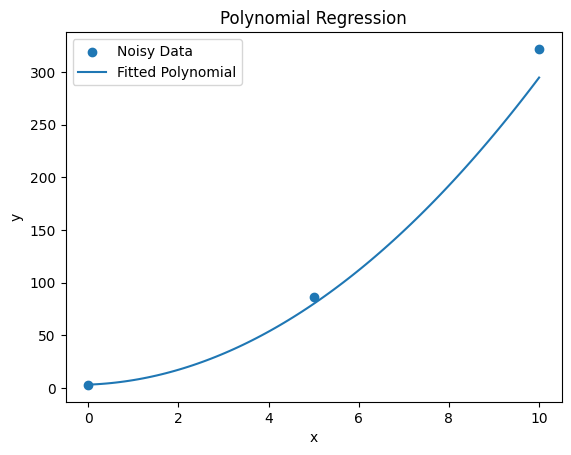

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成模拟数据（包含噪声）
np.random.seed(0)
x = np.linspace(0, 10, 3)  # 取3个数据点，对应二次多项式3个参数
true_params = np.array([1, 2, 3])  # 真实的多项式参数a0, a1, a2
y_true = true_params[0] + true_params[1] * x + true_params[2] * x ** 2
y = y_true + np.random.normal(0, 1, 3)  # 加入噪声

# 构建范德蒙矩阵
X = np.vander(x, 3)

# 求解多项式参数
params = np.linalg.inv(X.T @ X) @ X.T @ y

# 打印参数
print("估计的参数:", params)

# 绘制数据和拟合曲线
x_plot = np.linspace(0, 10, 100)
y_plot = params[0] + params[1] * x_plot + params[2] * x_plot ** 2
plt.scatter(x, y, label='Noisy Data')
plt.plot(x_plot, y_plot, label='Fitted Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


2. 给出至少五个不宜将问题视为独立同分布（IID）数据的例子
时间序列数据：例如股票价格随时间的变化。股票价格在相邻时间点之间存在趋势和相关性，今天的价格往往受昨天价格影响，不是独立的。如预测明天股票价格，不能简单认为各时间点数据独立。
视频帧数据：视频中相邻帧之间内容存在很强相关性，后一帧通常是前一帧的延续，比如一个人在视频中连续的动作，不能把每一帧当作独立图像看待。
文本数据中的上下文关系：在一段文本中，一个单词的含义往往依赖于上下文。例如 “苹果” 在 “我吃了一个苹果” 和 “苹果公司发布了新产品” 中含义不同，句子中单词不是独立的。
地理空间数据：不同地理位置的气候数据，相邻地区的气候往往相似，如相邻城市的温度、湿度等，不是独立同分布的。
社交网络数据：用户之间存在社交关系，一个用户的行为可能受其好友影响，比如用户是否点赞某个内容，和其好友的点赞行为有关，不是独立的。

3. 何时能看到零训练误差和零泛化误差
零训练误差：当模型的复杂度足够高，能够完全拟合训练数据时，可能出现零训练误差。比如神经网络层数足够多、参数足够多，或者多项式回归中多项式次数过高，使得模型可以记住训练数据的每一个细节，包括噪声。但这往往会导致过拟合。
零泛化误差：在理想情况下，当模型完美地捕捉到数据的真实分布规律，且数据没有噪声时，可能出现零泛化误差。实际中几乎不可能，不过如果数据量无穷大，模型复杂度合适且训练充分，泛化误差可以趋近于零。

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 生成简单模拟数据
np.random.seed(0)
x = np.random.randn(10, 1).astype(np.float32)
y = 2 * x + 1 + np.random.randn(10, 1).astype(np.float32) * 0.5
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# 构建复杂的神经网络模型（容易过拟合）
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model = ComplexNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_hat = model(x_tensor)
    loss = criterion(y_hat, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

Epoch 1, Loss: 10.625925064086914
Epoch 101, Loss: 0.08450932800769806
Epoch 201, Loss: 0.07783803343772888
Epoch 301, Loss: 0.0766122043132782
Epoch 401, Loss: 0.0759076252579689
Epoch 501, Loss: 0.07519007474184036
Epoch 601, Loss: 0.07488025724887848
Epoch 701, Loss: 0.07471483945846558
Epoch 801, Loss: 0.07459358125925064
Epoch 901, Loss: 0.0744684487581253


4. 为什么 K 折交叉验证计算成本很高
理论分析：K 折交叉验证需要将数据集分成 K 份，每次使用其中一份作为验证集，其余 K - 1 份作为训练集，这样要进行 K 次训练和验证过程。每次训练都要对模型进行初始化、参数更新等操作，随着数据集规模增大和模型复杂度提高，训练时间会大幅增加。而且每次训练都要在不同的数据子集上进行，涉及数据的划分、加载等额外操作，所以计算成本很高。


5. 为什么 K 折交叉验证误差估计有偏差
理论分析：K 折交叉验证误差估计有偏差主要原因是每次划分数据集时，训练集和验证集都只是原始数据集的子集。不同的划分方式会导致模型在不同子集上训练和验证，由于子集的数据分布可能与原始数据集存在差异，这就使得模型在验证集上的误差不能准确代表在整个数据集上的真实误差。而且 K 值的选择也会影响偏差，K 值过小，训练集和验证集的划分差异可能较大；K 值过大，计算成本增加且每个子集的数据量减少，也可能导致误差估计不准确。


6. 为什么 VC 维可能不是衡量函数类复杂度的好方法
理论分析：VC 维定义为一个函数类能够对任意标记（\(\pm1\) ）的点进行分类的最大点数。但它没有考虑函数的幅度等因素。例如，两个不同的函数类可能具有相同的 VC 维，但一个函数类中的函数变化幅度很大，另一个很小，那么它们对数据的拟合和泛化能力可能差异很大，而 VC 维无法区分这种差异。此外，VC 维是一种离散的度量，不能连续地反映函数类复杂度的细微变化。在实际应用中，一些复杂的函数类可能由于数据分布等原因，VC 维不能很好地体现其在特定任务上的复杂度和泛化能力。

7. 如何向经理说明需要更多数据


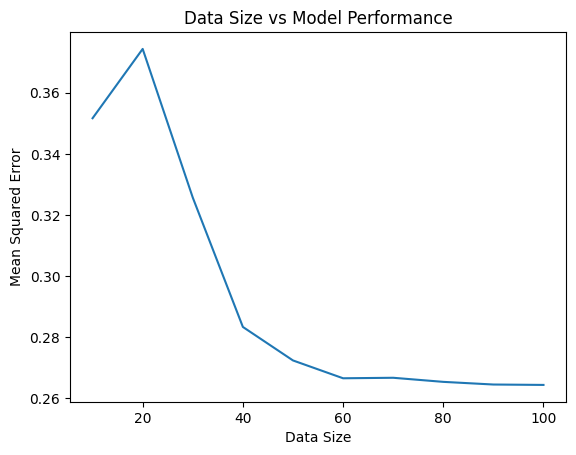

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 生成模拟数据
np.random.seed(0)
x = np.random.randn(100, 1).astype(np.float32)
y = 2 * x + 1 + np.random.randn(100, 1).astype(np.float32) * 0.5

data_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
mse_values = []

for size in data_sizes:
    x_subset = x[:size]
    y_subset = y[:size]
    model = LinearRegression()
    model.fit(x_subset, y_subset)
    y_pred = model.predict(x)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

plt.plot(data_sizes, mse_values)
plt.xlabel('Data Size')
plt.ylabel('Mean Squared Error')
plt.title('Data Size vs Model Performance')
plt.show()